##### IMPORTING REQUIRED LIBRARIES #####

In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

##### READING THE CSV FILE AND LOADING IT'S CONTENTS INTO A PANDAS DATAFRAME #####

In [138]:
df=pd.read_csv(r"D:\Python\Project\ecommerce_customer_data_large.csv")

##### TOP 5 ENTERIES #####

In [139]:
df.head()

,Customer ID,Purchase Date,Product Category,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returned,Returns,Customer Name,Age,Gender,Churn,Purchase Month,Purchase Year
0,43799,13-09-2023 18:42,Clothing,2,2076,PayPal,66,0.0,No,Jessica Jones,66,Female,0,9,2023
1,37031,13-09-2023 18:37,Books,3,3998,Credit Card,25,0.0,No,Julia Campbell,25,Female,0,9,2023
2,7982,13-09-2023 18:33,Home,4,4634,PayPal,68,0.0,No,Jessica Clark,68,Female,0,9,2023
3,25927,12-09-2023 13:54,Electronics,5,25465,PayPal,38,1.0,No,Michael Johnson,38,Male,0,9,2023
4,28694,13-09-2023 18:02,Home,2,4492,Credit Card,25,1.0,No,Jennifer Nichols,25,Female,0,9,2023


##### LAST 5 ENTERIES #####

In [140]:
df.tail()

,Customer ID,Purchase Date,Product Category,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returned,Returns,Customer Name,Age,Gender,Churn,Purchase Month,Purchase Year
249995,6380,01-01-2020 00:28,Home,5,5150,PayPal,54,0.0,No,Ashlee Johnson,54,Female,1,1,2020
249996,25222,01-01-2020 00:24,Clothing,1,4197,Cash,34,1.0,Yes,John Delgado,34,Female,0,1,2020
249997,51,07-01-2020 00:28,Clothing,2,103,Cash,18,NaN,NaN,Colleen Pace,18,Male,0,1,2020
249998,38053,13-03-2020 02:18,Clothing,3,102,Credit Card,18,0.0,No,Lori Yu,18,Male,0,3,2020
249999,43906,05-10-2020 07:47,Clothing,3,100,Credit Card,18,NaN,NaN,Ashley Hall,18,Male,0,10,2020


##### DIMENTIONS OF DATAFRAME #####

In [141]:
df.shape

(250000, 15)

##### SUMMARY OF DATAFRAME STURUCTURE #####

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Quantity               250000 non-null  int64  
 4   Total Purchase Amount  250000 non-null  int64  
 5   Payment Method         250000 non-null  object 
 6   Customer Age           250000 non-null  int64  
 7   Returned               202618 non-null  float64
 8   Returns                202618 non-null  object 
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
 13  Purchase Month         250000 non-null  int64  
 14  Purchase Year          250000 non-nu

##### CHECKING FOR DUPLICATES #####

In [143]:
df.duplicated().sum()

0

##### CHECKING FOR MISSING OR NULL VALUES IN COLUMNS #####

In [144]:
df.isnull().sum()

Customer ID                  0
Purchase Date                0
Product Category             0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returned                 47382
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
Purchase Month               0
Purchase Year                0
dtype: int64

- Dropping 'Returned' column since 'Returns' column contains the same information

In [145]:
df.drop('Returned',axis=1,inplace=True)

##### DEALING WITH NULL VALUES #####

In [146]:
df['Returns']=df['Returns'].fillna(df['Returns'].mode()[0])

In [147]:
df.isnull().sum()

Customer ID              0
Purchase Date            0
Product Category         0
Quantity                 0
Total Purchase Amount    0
Payment Method           0
Customer Age             0
Returns                  0
Customer Name            0
Age                      0
Gender                   0
Churn                    0
Purchase Month           0
Purchase Year            0
dtype: int64

##### GENERATING SUMMARY STATISTICS FOR NUMERICAL COLUMNS IN THE DATAFRAME #####

In [148]:
df.describe()

,Customer ID,Quantity,Total Purchase Amount,Customer Age,Age,Churn,Purchase Month,Purchase Year
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.00000,250000.000000,250000.000000
mean,25017.632092,3.004936,2727.053920,43.798276,43.798276,0.20052,6.190376,2021.377136
std,14412.515718,1.414737,1450.886867,15.364915,15.364915,0.40039,3.353238,1.074712
min,1.000000,1.000000,100.000000,18.000000,18.000000,0.00000,1.000000,2020.000000
25%,12590.000000,2.000000,1477.000000,30.000000,30.000000,0.00000,3.000000,2020.000000
50%,25011.000000,3.000000,2726.000000,44.000000,44.000000,0.00000,6.000000,2021.000000
75%,37441.250000,4.000000,3975.000000,57.000000,57.000000,0.00000,9.000000,2022.000000
max,50000.000000,5.000000,25465.000000,70.000000,70.000000,1.00000,12.000000,2023.000000


#### EXPLORATORY DATA ANALYSIS ####

In [149]:
print("Total Revenue(in Rs.) : ",df["Total Purchase Amount"].sum())

Total Revenue(in Rs.) :  681763480


##### Sales Performance Overview #####

In [150]:
temp1=df.groupby("Purchase Month")["Total Purchase Amount"].sum().reset_index()
temp1

,Purchase Month,Total Purchase Amount
0,1,62283958
1,2,57050354
2,3,62355745
3,4,60217450
4,5,62533980
5,6,60286066
6,7,62587751
7,8,63093912
8,9,52068193
9,10,46595245


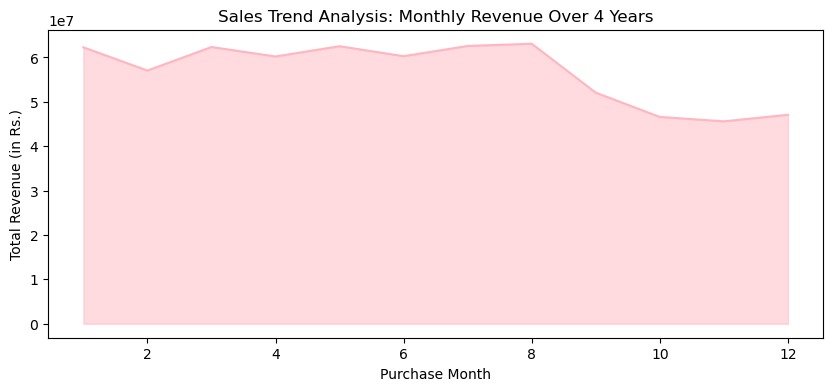

In [151]:
plt.figure(figsize=(10,4))
sns.lineplot(x=temp1['Purchase Month'],y=temp1['Total Purchase Amount'],color='lightpink')
plt.fill_between(temp1['Purchase Month'], temp1['Total Purchase Amount'], color='lightpink', alpha=0.5)
plt.xlabel('Purchase Month')
plt.ylabel('Total Revenue (in Rs.)')
plt.title('Sales Trend Analysis: Monthly Revenue Over 4 Years')
plt.show()

- Monthly revenue over four years reveals a peak around mid-year followed by a consistent decline. The chart highlights fluctuating sales 
trends with a clear upward movement in the first half and a downward trend in the second half of the year.

In [152]:
temp2=df.groupby('Purchase Year')['Total Purchase Amount'].sum().reset_index()
temp2

,Purchase Year,Total Purchase Amount
0,2020,184959504
1,2021,183672481
2,2022,184344727
3,2023,128786768


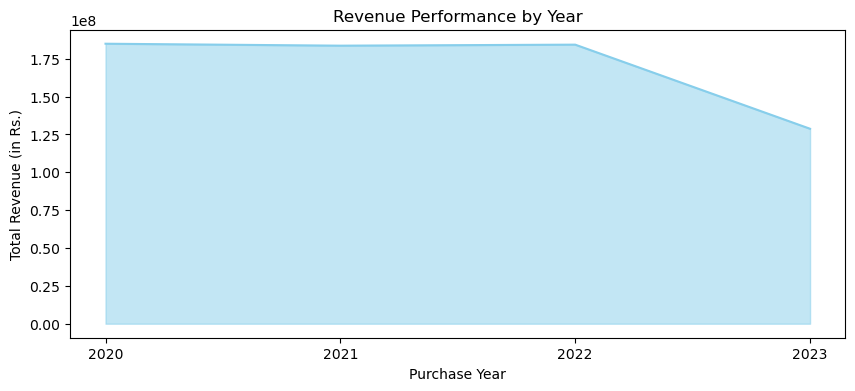

In [153]:
plt.figure(figsize=(10,4))
sns.lineplot(temp2,x='Purchase Year',y='Total Purchase Amount',color='skyblue')
plt.fill_between(temp2['Purchase Year'],temp2['Total Purchase Amount'],color='skyblue', alpha=0.5)
plt.xticks([2020, 2021, 2022, 2023])
plt.xlabel('Purchase Year')
plt.ylabel('Total Revenue (in Rs.)')
plt.title('Revenue Performance by Year')
plt.show()


- The area chart illustrates the trend of total revenue over a four-year period.  While revenue remained relatively stable from 2020 to 2022, 
a significant decline is observed in 2023, suggesting potential factors impacting revenue generation that year.

##### Revenue Trends Across Categories #####

In [154]:
temp3=df.groupby(['Product Category','Gender'])['Total Purchase Amount'].sum().reset_index()
temp3

,Product Category,Gender,Total Purchase Amount
0,Books,Female,98756562
1,Books,Male,70588674
2,Clothing,Female,99830815
3,Clothing,Male,70954307
4,Electronics,Female,99068344
5,Electronics,Male,71425862
6,Home,Female,99963070
7,Home,Male,71175846


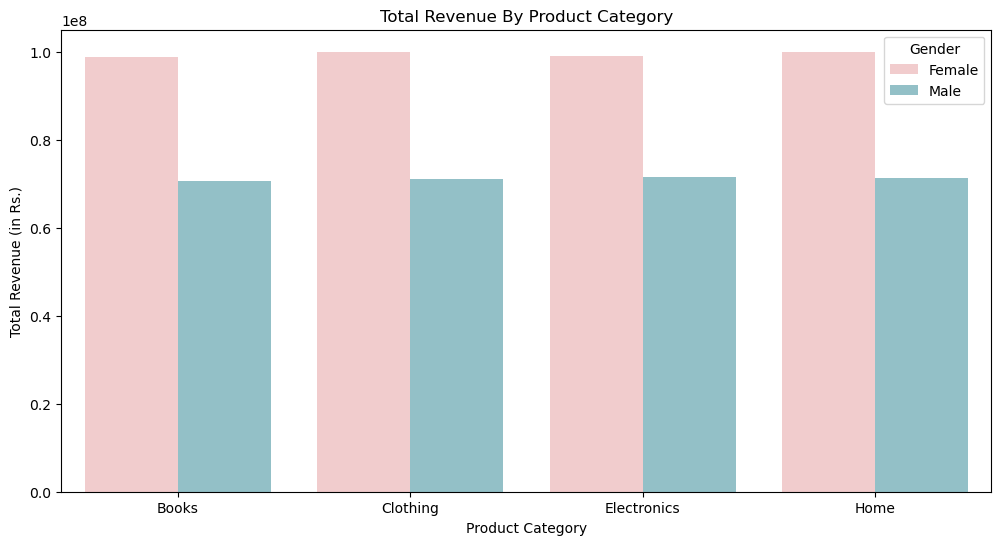

In [155]:
plt.figure(figsize=(12,6))
custom_palette = ["#F7C6C7", "#8AC6D0"]
sns.barplot(temp3,x='Product Category',y='Total Purchase Amount',palette=sns.color_palette(custom_palette),hue='Gender')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue (in Rs.)')
plt.title('Total Revenue By Product Category')
plt.show()

- Females generate higher revenue across all product categories compared to males.
- Books, Clothing, Electronics, and Home categories show a consistent trend, with female revenue significantly exceeding male revenue.
- Males contribute less revenue in every category, indicating either lower purchase frequency or spending.
- The revenue gap is evident in all categories, suggesting female customers are the primary buyers in these product segments.

##### Revenue By Payment Method #####

In [156]:
temp4=df.groupby(['Payment Method','Gender'])["Total Purchase Amount"].sum().reset_index()
temp4

,Payment Method,Gender,Total Purchase Amount
0,Cash,Female,92212251
1,Cash,Male,65160100
2,Credit Card,Female,155243421
3,Credit Card,Male,110656115
4,PayPal,Female,150163119
5,PayPal,Male,108328474


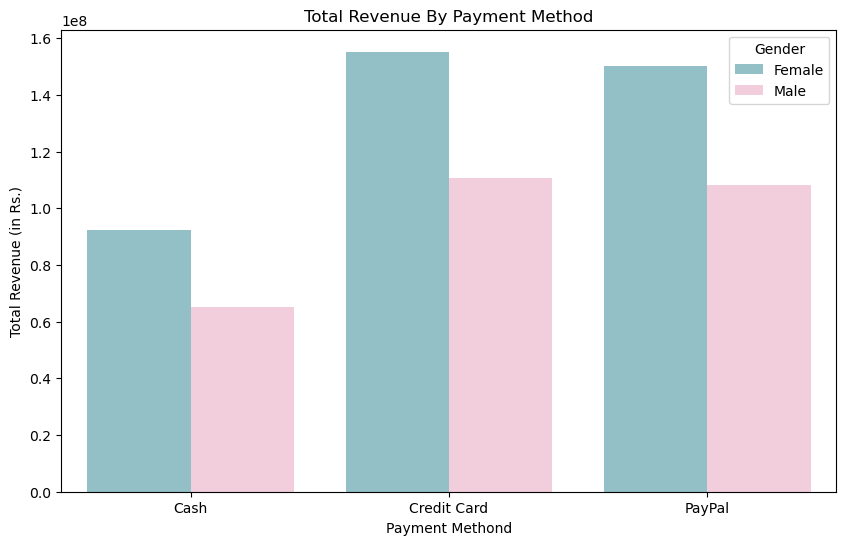

In [157]:
plt.figure(figsize=(10,6))
custom_palette = ["#8AC6D0","#F8C8DC"]
sns.barplot(temp4,x='Payment Method',y='Total Purchase Amount',hue='Gender',palette=sns.color_palette(custom_palette))
plt.xlabel('Payment Methond')
plt.ylabel('Total Revenue (in Rs.)')
plt.title('Total Revenue By Payment Method')
plt.show()

- Credit Card and PayPal generate the highest revenue, with females contributing more than males in both.
- Cash payments have the lowest revenue, with a smaller gap between male and female customers.
- Females prefer digital payments (Credit Card & PayPal) over cash, indicating a shift towards online transactions.
- Males generate less revenue across all payment methods, suggesting lower spending or fewer transactions compared to females.

##### Revenue By Gender #####

In [158]:
temp5=df.groupby('Gender')['Total Purchase Amount'].sum().reset_index()
temp5

,Gender,Total Purchase Amount
0,Female,397618791
1,Male,284144689


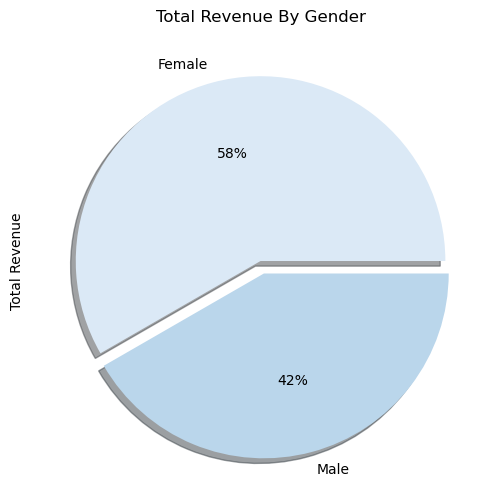

In [159]:
plt.figure(figsize=(10,6))
temp5['Total Purchase Amount'].plot(kind='pie',autopct='%1.f%%',labels=temp5['Gender'],explode=[0,0.07],shadow=True,colors=sns.color_palette('Blues'))
plt.title("Total Revenue By Gender")
plt.ylabel("Total Revenue")
plt.show()

- Females contribute 58% of total revenue, which is higher than males.
- Males account for 42% of total revenue, indicating a lower spending pattern compared to females.
- The revenue distribution suggests female customers are the dominant buyers in this dataset.
- The slight gap between male and female revenue implies a potential opportunity to increase male customer engagement.

##### Preferred Payment Methods #####

In [160]:
temp6=df['Payment Method'].value_counts().reset_index()
temp6

,Payment Method,count
0,Credit Card,97194
1,PayPal,94965
2,Cash,57841


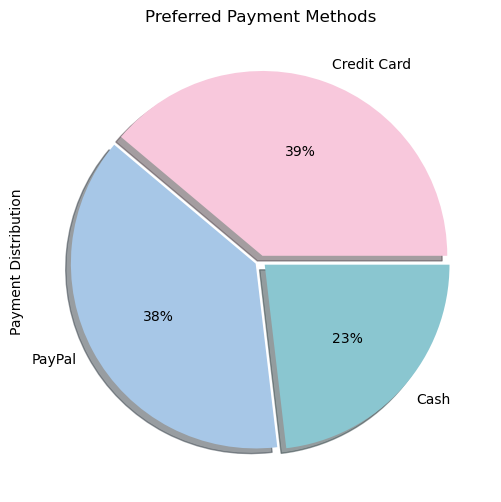

In [173]:
plt.figure(figsize=(10,6))
temp6['count'].plot(kind='pie',labels=temp6['Payment Method'],autopct="%1.0f%%",explode=[0.03,0.03,0.03],
                    colors=sns.color_palette(["#F8C8DC", "#A7C7E7","#8AC6D0"]),shadow=True)
plt.title('Preferred Payment Methods')
plt.ylabel('Payment Distribution')
plt.show()

- Credit Card is the most used payment method, contributing 39% of total transactions.
- PayPal follows closely behind at 38%, indicating a strong preference for digital payments.
- Cash payments account for only 23%, showing that fewer customers prefer cash transactions.
- The high preference for digital payments (Credit Card & PayPal) suggests a shift towards online transactions.

##### Age Distribution of Customers Purchasing #####

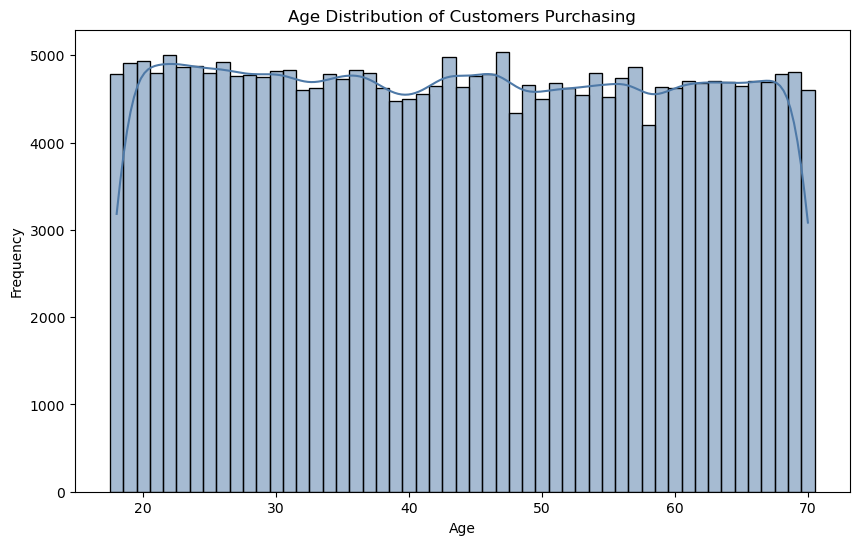

In [162]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'],kde=True,discrete=True,color='#4E79A7')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Customers Purchasing')
plt.show()

- Customer purchases are evenly distributed across different age groups, with no significant peaks.
- Most customers fall between the ages of 18 and 70, indicating a broad customer base.
- The frequency of purchases remains relatively stable, suggesting age is not a major factor in purchasing behavior.
- A slight decline at the lower and upper age ranges suggests fewer younger and older shoppers.

##### Highest Value Customers #####

In [163]:
temp7=df.groupby('Customer Name')['Total Purchase Amount'].sum().sort_values(ascending=False).head(10).reset_index()
temp7

,Customer Name,Total Purchase Amount
0,Michael Johnson,363400
1,Michael Smith,321691
2,Michael Brown,299694
3,James Smith,265814
4,Michael Jones,265805
5,John Smith,258797
6,David Johnson,247292
7,John Johnson,234897
8,Michael Williams,221734
9,Jennifer Smith,220167


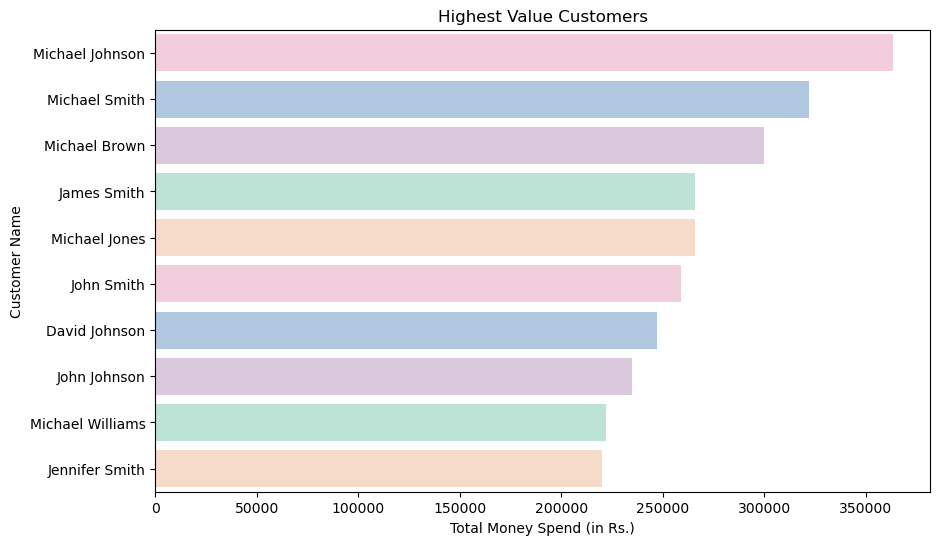

In [164]:
plt.figure(figsize=(10,6))
sns.barplot(temp7,y='Customer Name',x='Total Purchase Amount',palette=["#F8C8DC", "#A7C7E7", "#DCC6E0", "#B5EAD7", "#FFDAC1"])
plt.xlabel('Total Money Spend (in Rs.)')
plt.ylabel('Customer Name')
plt.title('Highest Value Customers')
plt.show()

- This horizontal bar chart displays the top 10 customers ranked by their total spending.  Michael Johnson leads with the highest total spend, 
significantly outpacing other customers in this group. The chart allows for quick visual comparison of customer value and highlights the relative
contribution of top spenders.

##### Product Returns by Category #####

In [165]:
temp8=df.groupby('Product Category')['Returns'].value_counts().reset_index()
temp8

,Product Category,Returns,count
0,Books,No,48996
1,Books,Yes,13251
2,Clothing,No,40300
3,Clothing,Yes,22281
4,Electronics,No,45289
5,Electronics,Yes,17341
6,Home,No,44299
7,Home,Yes,18243


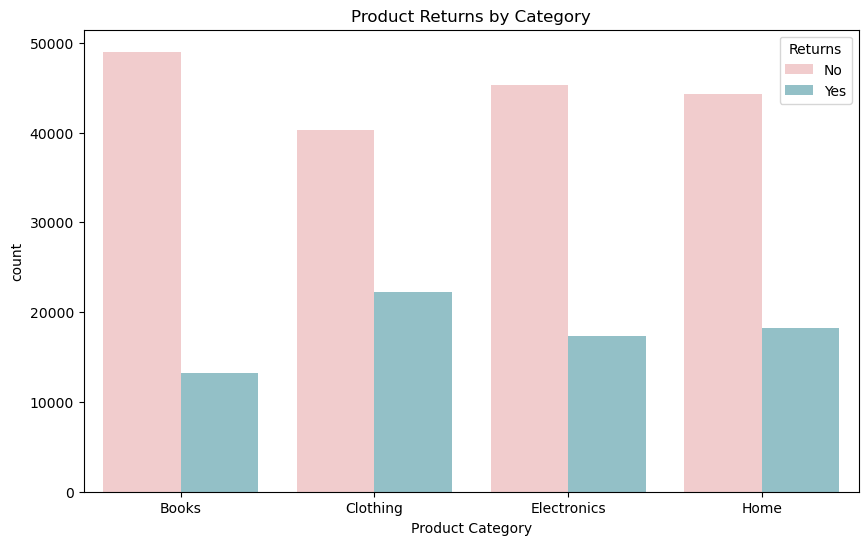

In [166]:
plt.figure(figsize=(10,6))
sns.barplot(temp8,x='Product Category',y='count',hue='Returns',palette=["#F7C6C7", "#8AC6D0"])
plt.xlabel('Product Category')
plt.title('Product Returns by Category')
plt.show()

- Books have the lowest return rate, with significantly fewer returns compared to other categories.
- Clothing has the highest return rate, indicating frequent size or style mismatches.
- Electronics and Home products have moderate return rates, suggesting potential issues like defects or customer dissatisfaction.
- Overall, most products are not returned, as indicated by the larger proportion of "No" bars across all categories.

##### Product Returns by Payment Method #####

In [167]:
temp9=df.groupby('Payment Method')['Returns'].value_counts().reset_index()
temp9

,Payment Method,Returns,count
0,Cash,No,40035
1,Cash,Yes,17806
2,Credit Card,No,69381
3,Credit Card,Yes,27813
4,PayPal,No,69468
5,PayPal,Yes,25497


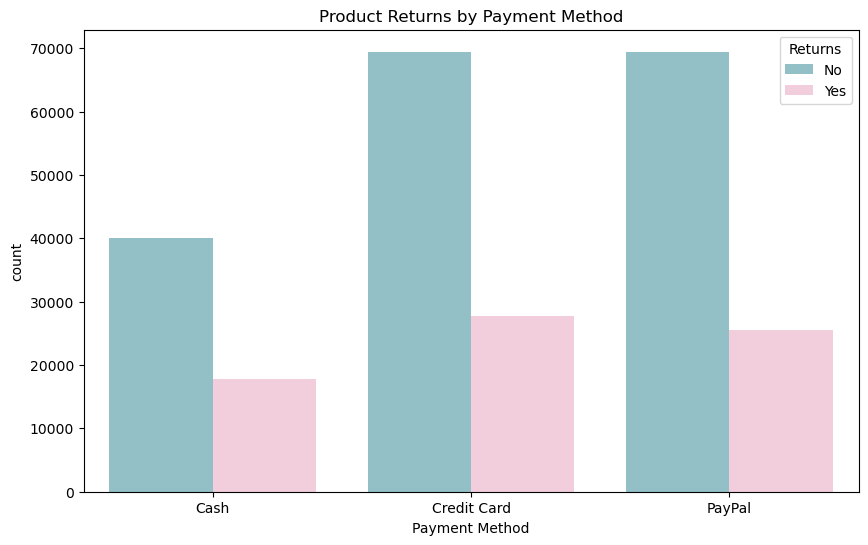

In [168]:
plt.figure(figsize=(10,6))
sns.barplot(temp9,x='Payment Method',y='count',hue='Returns',palette=["#8AC6D0","#F8C8DC"])
plt.title('Product Returns by Payment Method')
plt.show()

- Credit Card and PayPal have the highest number of purchases, with both having significantly more transactions than cash.
- Returns are highest for Credit Card purchases, followed by PayPal, while cash purchases have fewer returns.
- Cash purchases have the lowest total count, but the proportion of returns is still notable.
- Customers paying with digital methods (Credit Card & PayPal) tend to return more items, possibly due to the ease of online refunds and return policies.

##### Total Purchase Amount by Product #####

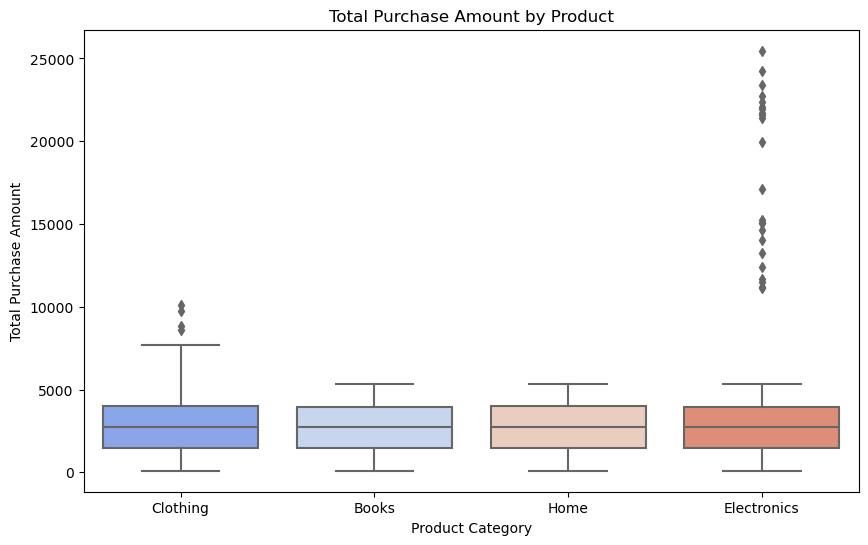

In [169]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Product Category',y='Total Purchase Amount',data=df,palette='coolwarm')
plt.title('Total Purchase Amount by Product')
plt.show()

- Electronics have the highest purchase amounts, with several extreme outliers exceeding 20,000. This suggests that some high-value items significantly increase the total purchase amount.
- Clothing, Books, and Home categories have relatively similar purchase distributions, with interquartile ranges (IQRs) showing moderate variation.
- The median purchase amount is similar across all categories, except for Electronics, which shows higher outliers.
- Presence of outliers in Clothing and Electronics: Some purchases are significantly higher than the usual range, which might indicate premium products or bulk purchases.
- Books and Home have a more consistent purchase pattern, with fewer outliers compared to Electronics and Clothing.

#### CONCLUSION ####

- The eCommerce data analysis provided key insights into sales trends, customer behavior, and revenue drivers. Discount strategies played a crucial role in influencing purchases, while category-wise and gender-based trends helped in targeted marketing. Overall, data-driven decisions can enhance customer experience and boost business growth.